In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score,RocCurveDisplay, plot_confusion_matrix, confusion_matrix


**Importing the dataset**

In [ ]:
df= pd.read_csv('Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df['Gender']=df['Gender'].map({'Male':1,"Female":0})

**Splitting the dataset into the Training set and Test set**

In [ ]:
X = df[['Gender', 'Age','EstimatedSalary']]
y = df['Purchased']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=0)

In [ ]:
X_train.shape

(340, 3)

In [ ]:
X_test.shape

(60, 3)

**Feature Scaling**

In [ ]:
scaler =preprocessing.StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [ ]:
dt = tree.DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0])

**Predicting the Test set results**

In [ ]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

Test set accuracy: 0.87
Test set auc: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


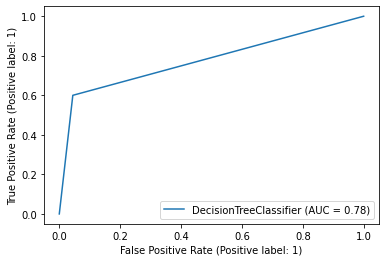

In [ ]:

acc =accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)

**Making the Confusion Matrix**

In [ ]:
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  2],
       [ 6,  9]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


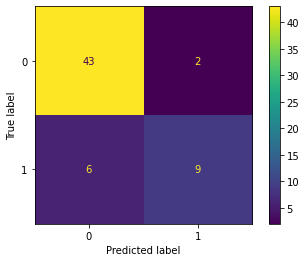

In [ ]:
plot_confusion_matrix(dt, X_test, y_test);

**Visualising the Training set results**

In [ ]:
dt.score(X_train, y_train)

1.0

**Visualising the Test set results**

In [ ]:
dt.score(X_test, y_test)

0.8666666666666667

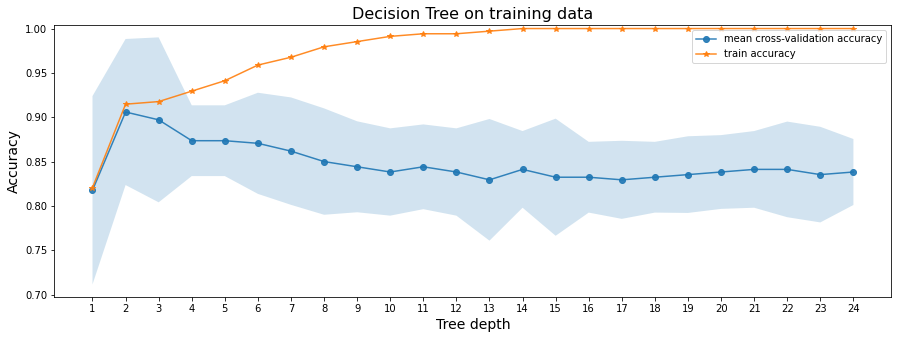

In [ ]:
def run_cross_validation(X,y, tree_depths, cv=5, scoring='accuracy'):
    """Cross Validation function that returns, mean cross validation score, standard deviation cross validation score\
        and accuracy score"""

    cv_score_list = []
    cv_score_std = []
    cv_score_mean = []
    accuracy_score= []

    for depth in tree_depths:
        tree_model = tree.DecisionTreeClassifier(max_depth=depth)
        cv_score = cross_val_score(tree_model, X,y, cv=cv, scoring=scoring)

        cv_score_list.append(cv_score)
        cv_score_mean.append(cv_score.mean())
        cv_score_std.append(cv_score.std())
        accuracy_score.append(tree_model.fit(X,y).score(X,y))
    
    cv_score_mean = np.array(cv_score_mean)
    cv_score_std = np.array(cv_score_std)
    accuracy_score = np.array(accuracy_score)

    return cv_score_mean, cv_score_std, accuracy_score


def plot_cross_validation(depths, cv_score_mean, cv_score_std, accuracy_score, title):
    """Function to plot cross validation score"""

    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_score_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_score_mean-2*cv_score_std, cv_score_mean+2*cv_score_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_score, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# define a range of tree depth
tree_depth = range(1,25)

# apply cross validation to training data
mean_cv_score, std_cv_score, accuracy_score = run_cross_validation(X_train, y_train, tree_depths=tree_depth)


# plot the result of cross validation
plot_cross_validation(tree_depth, mean_cv_score, std_cv_score, accuracy_score, "Decision Tree on training data")

Text(42.0, 0.5, 'Truth')

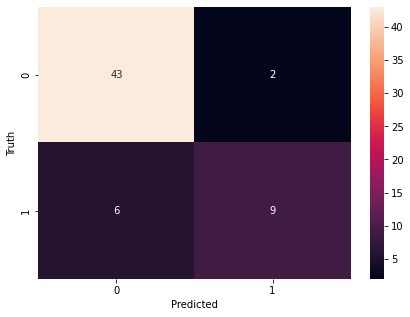

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

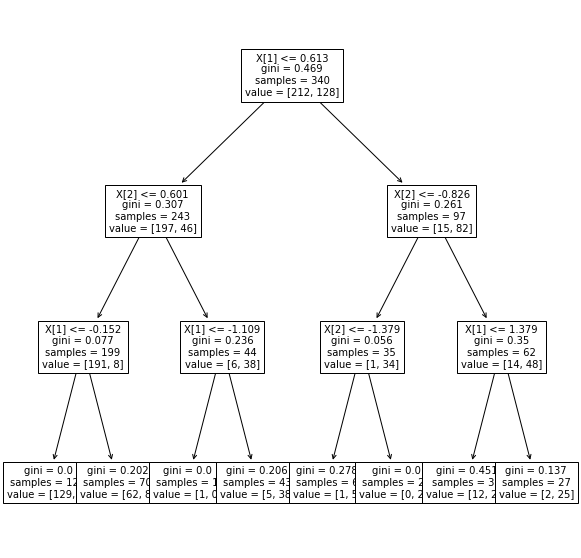

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dt, fontsize=10)
plt.show()